# Installing rdkit for molecular visualization !


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh 
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh 
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local 
! conda install -c rdkit rdkit -y 
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [9]:
import numpy as np
import pandas as pd
import pprint 

Changing dir to project dir 

In [10]:
cd /content/drive/MyDrive/ML_2/project

/content/drive/MyDrive/ML_2/project


Reading 250k smiles dataset 

In [11]:
df = pd.read_csv('250k_smiles.csv')

In [277]:
df.head()

,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182


In [11]:
df.smiles

0                 CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n
1            C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n
2         N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...
3         CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...
4         N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...
                                ...                        
249450    CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc...
249451    Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...
249452             Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1\n
249453         Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1\n
249454    O=C(CC(c1ccccc1)c1ccccc1)N1CCN(S(=O)(=O)c2cccc...
Name: smiles, Length: 249455, dtype: object

In [12]:
df.smiles[0]

'CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n'

In [14]:
from rdkit import Chem

In [10]:
m = Chem.MolFromSmiles(df.smiles[0])
m.GetNumAtoms()

24

Visualizing the molecules in Zinc Dataset 

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

In [16]:
mols = [Chem.MolFromSmiles(smi) for smi in df.smiles]
sampleidx = np.random.choice(list(range(len(mols))), size=400, replace=False)
samplemols = [mols[i] for i in sampleidx]


In [17]:
sampleact = [9-np.log10(df['SAS'][idx]) for idx in sampleidx]

PCA t-SNE for getting chemical space and normalize the data.

In [18]:
fps = [AllChem.GetMorganFingerprintAsBitVect(m,2) for m in samplemols]
def fp2arr(fp):
    arr = np.zeros((0,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    return arr
X = np.asarray([fp2arr(fp) for fp in fps])

In [19]:
X.shape

(400, 2048)

In [20]:
size = 20
N = size*size
data = PCA(n_components=100).fit_transform(X.astype(np.float32))
embeddings = TSNE(init='pca', random_state=794, verbose=2).fit_transform(data)
embeddings -= embeddings.min(axis=0)
embeddings /= embeddings.max(axis=0)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.008s...
[t-SNE] Computed neighbors for 400 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 1.794616
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 79.5521317, gradient norm = 0.4340051 (50 iterations in 0.230s)
[t-SNE] Iteration 100: error = 83.9060211, gradient norm = 0.4077000 (50 iterations in 0.105s)
[t-SNE] Iteration 150: error = 80.9550018, gradient norm = 0.4482836 (50 iterations in 0.116s)
[t-SNE] Iteration 200: error = 80.7176361, gradient norm = 0.4596181 (50 iterations in 0.112s)
[t-SNE] Iteration 250: error = 80.9723587, gradient norm = 0.4496589 (50 iterations in 0.112s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.972359
[t-SNE] Iteration 300: error = 1.7843372, gradient norm = 0.0048324 (50 iterations in 0.102s)
[t-SNE] Iteration 350: error = 1.6662548, gradient norm = 0.0018741 (

### Plotting the latent space of 400 molecules in the dataset 

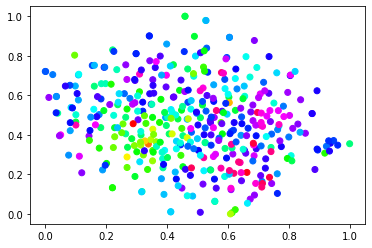

In [21]:
plt.scatter(embeddings[:,0], embeddings[:,1], c=sampleact, cmap='hsv')

In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [23]:
sampleidx = np.random.choice(list(range(len(mols))), size=6, replace=False)
samplemols = [mols[i] for i in sampleidx]

Plotting random molecules from dataset

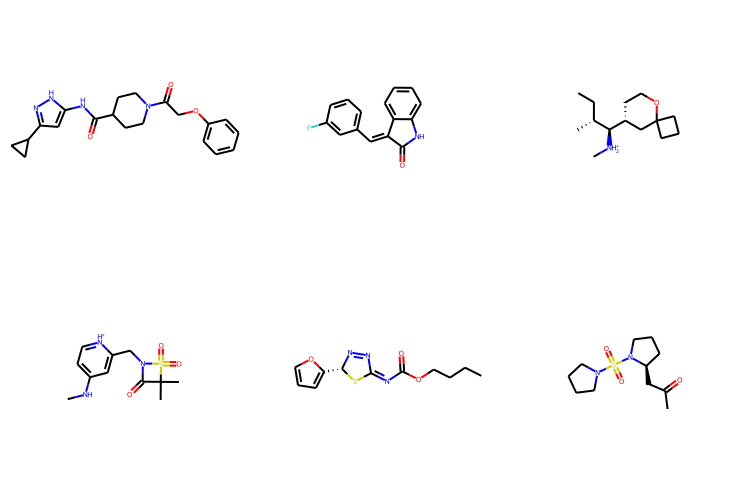

In [24]:
Draw.MolsToGridImage(samplemols,molsPerRow=3,subImgSize=(250,250))

In [16]:
df_smiles = df['smiles']

In [26]:
df_smiles

0                 CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n
1            C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n
2         N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...
3         CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...
4         N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...
                                ...                        
249450    CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc...
249451    Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...
249452             Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1\n
249453         Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1\n
249454    O=C(CC(c1ccccc1)c1ccccc1)N1CCN(S(=O)(=O)c2cccc...
Name: smiles, Length: 249455, dtype: object

Processing the data 

In [17]:
from sklearn.model_selection import train_test_split

smiles_train, smiles_test = train_test_split(df["smiles"], random_state=42)
print (smiles_train.shape)
print (smiles_test.shape)

(187091,)
(62364,)


In [18]:
charset = set("".join(list(df.smiles))+"!E")
char_to_int = dict((c,i) for i,c in enumerate(charset))
int_to_char = dict((i,c) for i,c in enumerate(charset))
embed = max([len(smile) for smile in df.smiles]) + 5
print (str(charset))
print(len(charset), embed)

{'r', '8', 'C', '6', '1', '5', '[', '!', 'P', 'O', ']', '=', 'I', '+', '(', 'n', '2', '3', '@', '\n', 'S', '7', 'E', '#', 'B', 'N', ')', 's', '-', '4', 'o', 'c', 'F', 'l', 'H', '/', '\\'}
37 115


In [19]:
char_to_int


{'\n': 19,
 '!': 7,
 '#': 23,
 '(': 14,
 ')': 26,
 '+': 13,
 '-': 28,
 '/': 35,
 '1': 4,
 '2': 16,
 '3': 17,
 '4': 29,
 '5': 5,
 '6': 3,
 '7': 21,
 '8': 1,
 '=': 11,
 '@': 18,
 'B': 24,
 'C': 2,
 'E': 22,
 'F': 32,
 'H': 34,
 'I': 12,
 'N': 25,
 'O': 9,
 'P': 8,
 'S': 20,
 '[': 6,
 '\\': 36,
 ']': 10,
 'c': 31,
 'l': 33,
 'n': 15,
 'o': 30,
 'r': 0,
 's': 27}

In [21]:
len(charset)

37

In [17]:
X_train[8]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [199]:
charset = [" ",'I', '\\', '+', 'P', 'B', 'F', '#', 'S', '\n', 'c', '(', '6', '@', '-', '/', 'N', '4', 'n', '[', '3', 'H', '7', 'E', 'l', ']', '2', 's', 'r', '8', '!', '5', ')', '1', '=', 'o', 'C', 'O']
print(len(charset))

38


Cc1cc(F)cc([C@H](N)C2([NH+](C)C)CCCC2)c1

(187091, 114, 38)


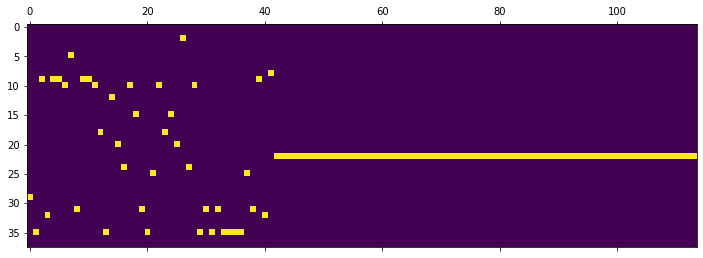

In [215]:
def vectorize(smiles):
        one_hot =  np.zeros((smiles.shape[0], embed , len(charset)),dtype=np.int8)
        for i,smile in enumerate(smiles):
            #encode the startchar
            one_hot[i,0,char_to_int["!"]] = 1
            #encode the rest of the chars
            for j,c in enumerate(smile):
                one_hot[i,j+1,char_to_int[c]] = 1
            #Encode endchar
            one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
        #Return two, one for input and the other for output
        return one_hot[:,0:-1,:], one_hot[:,1:,:]
X_train, Y_train = vectorize(smiles_train.values)
X_test,Y_test = vectorize(smiles_test.values)
print (smiles_train.iloc[0])
plt.matshow(X_train[0].T)
print (X_train.shape)

Creating defination functions for one hot encoding and decoding smiles 

In [41]:
import h5py
import numpy as np
from rdkit import Chem


def one_hot_array(i, n):
    return list(map(int, [ix == i for ix in range(n)]))

def one_hot_index(vec, charset):
    return list(map(charset.index, vec))

def from_one_hot_array(vec):
    oh = np.where(vec == 1)
    if oh[0].shape == (0,):
        return None
    return int(oh[0][0])

def decode_smiles_from_indexes(vec, charset):
    return "".join(map(lambda x: charset[x], vec)).strip()

In [51]:
def encode_smiles(smiles, model, charset):
    cropped = list(smiles.ljust(114))
    preprocessed = np.array([list(map(lambda x: one_hot_array(x, len(charset)), one_hot_index(cropped, charset)))])
    latent = model.encoder.predict(preprocessed)
    return latent

In [27]:
def decode_latent_molecule(latent, model, charset, latent_dim):
    decoded = model.decoder.predict(latent.reshape(1, latent_dim)).argmax(axis=2)[0]
    smiles = decode_smiles_from_indexes(decoded, charset)
    return smiles

Creating interpolation function 

In [28]:
def interpolate(source_smiles, dest_smiles, steps, charset, model, latent_dim):
    source_latent = encode_smiles(source_smiles, model, charset)
    dest_latent = encode_smiles(dest_smiles, model, charset)
    step = (dest_latent - source_latent) / float(steps)
    results = []
    for i in range(steps):
        item = source_latent + (step * i)        
        decoded = decode_latent_molecule(item, model, charset, latent_dim)
        results.append(decoded)
    return results

In [29]:
def get_unique_mols(mol_list):
    inchi_keys = [Chem.InchiToInchiKey(Chem.MolToInchi(m)) for m in mol_list]
    u, indices = np.unique(inchi_keys, return_index=True)
    unique_mols = [[mol_list[i], inchi_keys[i]] for i in indices]
    return unique_mols

Building the model architecture for VAE 

Reference : https://arxiv.org/pdf/1610.02415.pdf

In [30]:
import copy
from keras import backend as K
from keras import objectives
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.layers.core import Dense, Activation, Flatten, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import GRU
from keras.layers.convolutional import Convolution1D

class MoleculeVAE():

    autoencoder = None
    
    def create(self,
               charset,
               max_length = 114,
               latent_rep_size = 114,
               weights_file = None):
        charset_length = len(charset)
        
        x = Input(shape=(max_length, charset_length))
        _, z = self._buildEncoder(x, latent_rep_size, max_length)
        self.encoder = Model(x, z)

        encoded_input = Input(shape=(latent_rep_size,))
        self.decoder = Model(
            encoded_input,
            self._buildDecoder(
                encoded_input,
                latent_rep_size,
                max_length,
                charset_length
            )
        )

        x1 = Input(shape=(max_length, charset_length))
        vae_loss, z1 = self._buildEncoder(x1, latent_rep_size, max_length)
        self.autoencoder = Model(
            x1,
            self._buildDecoder(
                z1,
                latent_rep_size,
                max_length,
                charset_length
            )
        )

        if weights_file:
            self.autoencoder.load_weights(weights_file)
            self.encoder.load_weights(weights_file, by_name = True)
            self.decoder.load_weights(weights_file, by_name = True)

        self.autoencoder.compile(optimizer = 'Adam',
                                 loss = vae_loss,
                                 metrics = ['accuracy'])

    def _buildEncoder(self, x, latent_rep_size, max_length, epsilon_std = 0.01):
        h = Convolution1D(9, 9, activation = 'relu', name='conv_1')(x)
        h = Convolution1D(9, 9, activation = 'relu', name='conv_2')(h)
        h = Convolution1D(10, 11, activation = 'relu', name='conv_3')(h)
        h = Flatten(name='flatten_1')(h)
        h = Dense(435, activation = 'relu', name='dense_1')(h)

        def sampling(args):
            z_mean_, z_log_var_ = args
            batch_size = K.shape(z_mean_)[0]
            epsilon = K.random_normal(shape=(batch_size, latent_rep_size), mean=0., stddev = epsilon_std)
            return z_mean_ + K.exp(z_log_var_ / 2) * epsilon

        z_mean = Dense(latent_rep_size, name='z_mean', activation = 'linear')(h)
        z_log_var = Dense(latent_rep_size, name='z_log_var', activation = 'linear')(h)

        def vae_loss(x, x_decoded_mean):
            x = K.flatten(x)
            x_decoded_mean = K.flatten(x_decoded_mean)
            xent_loss = max_length * objectives.binary_crossentropy(x, x_decoded_mean)
            kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis = -1)
            return xent_loss + kl_loss

        return (vae_loss, Lambda(sampling, output_shape=(latent_rep_size,), name='lambda')([z_mean, z_log_var]))

    def _buildDecoder(self, z, latent_rep_size, max_length, charset_length):
        h = Dense(latent_rep_size, name='latent_input', activation = 'relu')(z)
        h = RepeatVector(max_length, name='repeat_vector')(h)
        h = GRU(501, return_sequences = True, name='gru_1')(h)
        h = GRU(501, return_sequences = True, name='gru_2')(h)
        h = GRU(501, return_sequences = True, name='gru_3')(h)
        return TimeDistributed(Dense(charset_length, activation='softmax'), name='decoded_mean')(h)

    def save(self, filename):
        self.autoencoder.save_weights(filename)
    
    def load(self, charset, weights_file, latent_rep_size = 114):
        self.create(charset, weights_file = weights_file, latent_rep_size = latent_rep_size)

Importing keras backend 

In [31]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [56]:
latent_dim = 114

In [62]:
model = MoleculeVAE()

In [32]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [131]:
checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/ML_2/project/best_model.h5',
                                   verbose = 1,
                                   save_best_only = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                  factor = 0.2,
                                  patience = 3,
                                  min_lr = 0.0001)

Creating the model and training ! 

In [95]:
model.create(charset, latent_rep_size)

checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/ML_2/project/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5',
                                   verbose = 1,
                                   save_best_only = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                  factor = 0.2,
                                  patience = 3,
                                  min_lr = 0.0001)

model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 5,
         batch_size = 600,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/5
187091/187091 [==============================] - ETA: 0s - loss: 3.1805 - accuracy: 0.6700

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_loss improved from inf to 2.69514, saving model to /content/drive/MyDrive/ML_2/project
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_2/project/assets
187091/187091 [==============================] - 134s 718us/sample - loss: 3.1805 - accuracy: 0.6700 - val_loss: 2.6951 - val_accuracy: 0.6934
Epoch 2/5
187091/187091 [==============================] - ETA: 0s - loss: 2.7302 - accuracy: 0.6900
Epoch 00002: val_loss improved from 2.69514 to 2.67614, saving model to /content/drive/MyDrive/ML_2/project
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_2/project/assets
187091/187091 [==============================] - 130s 697us/sample - loss: 2.7302 - accuracy: 0.6900 - val_loss: 2.6761 - val_accuracy: 0.6911
Epoch 3/5
187091/187091 [==============================] - ETA: 0s - loss: 2.6652 - accuracy: 0.6984
Epoch 00003: val_loss improved from 2.67614 to 2.60478, saving model to /content/drive/MyDrive/ML_2/project
INFO:tensorflow:Assets written to: 

Training the model in batches not to overload memory 

In [103]:
model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 15,
         batch_size = 1200,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/15
187091/187091 [==============================] - ETA: 0s - loss: 2.4346 - accuracy: 0.7346
Epoch 00001: val_loss did not improve from 2.47377
187091/187091 [==============================] - 95s 508us/sample - loss: 2.4346 - accuracy: 0.7346 - val_loss: 2.4836 - val_accuracy: 0.7230
Epoch 2/15
187091/187091 [==============================] - ETA: 0s - loss: 2.3582 - accuracy: 0.7417
Epoch 00002: val_loss improved from 2.47377 to 2.30983, saving model to /content/drive/MyDrive/ML_2/project
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_2/project/assets
187091/187091 [==============================] - 103s 549us/sample - loss: 2.3582 - accuracy: 0.7417 - val_loss: 2.3098 - val_accuracy: 0.7426
Epoch 3/15
187091/187091 [==============================] - ETA: 0s - loss: 2.3028 - accuracy: 0.7463
Epoch 00003: val_loss did not improve from 2.30983
187091/187091 [==============================] - 95s 508us/sample - lo

In [112]:
model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 15,
         batch_size = 1200,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/15
187091/187091 [==============================] - ETA: 0s - loss: 1.4521 - accuracy: 0.8471
Epoch 00001: val_loss improved from 1.51263 to 1.38917, saving model to /content/drive/MyDrive/ML_2/project
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_2/project/assets
187091/187091 [==============================] - 102s 544us/sample - loss: 1.4521 - accuracy: 0.8471 - val_loss: 1.3892 - val_accuracy: 0.8553
Epoch 2/15
187091/187091 [==============================] - ETA: 0s - loss: 1.4117 - accuracy: 0.8522
Epoch 00002: val_loss improved from 1.38917 to 1.32776, saving model to /content/drive/MyDrive/ML_2/project
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_2/project/assets
187091/187091 [==============================] - 102s 544us/sample - loss: 1.4117 - accuracy: 0.8522 - val_loss: 1.3278 - val_accuracy: 0.8625
Epoch 3/15
187091/187091 [==============================] - ETA: 0s - loss: 1.3899 - ac

In [122]:
model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 15,
         batch_size = 1200,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/15
187091/187091 [==============================] - ETA: 0s - loss: 0.9954 - accuracy: 0.9012
Epoch 00001: val_loss improved from inf to 0.85052, saving model to /content/drive/MyDrive/ML_2/project/weights-improvement-01-0.92.hdf5
187091/187091 [==============================] - 95s 508us/sample - loss: 0.9954 - accuracy: 0.9012 - val_loss: 0.8505 - val_accuracy: 0.9164
Epoch 2/15
187091/187091 [==============================] - ETA: 0s - loss: 0.8658 - accuracy: 0.9146
Epoch 00002: val_loss improved from 0.85052 to 0.78736, saving model to /content/drive/MyDrive/ML_2/project/weights-improvement-02-0.92.hdf5
187091/187091 [==============================] - 95s 506us/sample - loss: 0.8658 - accuracy: 0.9146 - val_loss: 0.7874 - val_accuracy: 0.9226
Epoch 3/15
187091/187091 [==============================] - ETA: 0s - loss: 0.8468 - accuracy: 0.9165
Epoch 00003: val_loss improved from 0.78736 to 0.76765, saving model to /content/

In [132]:
model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 15,
         batch_size = 1200,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/15
187091/187091 [==============================] - ETA: 0s - loss: 0.5812 - accuracy: 0.9438
Epoch 00001: val_loss improved from inf to 0.57225, saving model to /content/drive/MyDrive/ML_2/project/best_model.h5
187091/187091 [==============================] - 95s 508us/sample - loss: 0.5812 - accuracy: 0.9438 - val_loss: 0.5723 - val_accuracy: 0.9445
Epoch 2/15
187091/187091 [==============================] - ETA: 0s - loss: 0.7543 - accuracy: 0.9272
Epoch 00002: val_loss improved from 0.57225 to 0.56193, saving model to /content/drive/MyDrive/ML_2/project/best_model.h5
187091/187091 [==============================] - 97s 521us/sample - loss: 0.7543 - accuracy: 0.9272 - val_loss: 0.5619 - val_accuracy: 0.9457
Epoch 3/15
187091/187091 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.9339
Epoch 00003: val_loss improved from 0.56193 to 0.54938, saving model to /content/drive/MyDrive/ML_2/project/best_model.

Saved 5 diff models after each batch run for loading and testing 

In [123]:
model.save('VAE_Drug_model_V.h5') 

Creating the latent space

In [83]:
Z_mean = model.encoder.predict(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [68]:
Z_mean.shape

(62364, 114)

In [69]:
Y_test.shape

(62364, 114, 58)

In [79]:
from rdkit.Chem import Draw, Descriptors

In [80]:
logp = smiles_test.apply(Chem.MolFromSmiles).apply(Descriptors.MolLogP)

Plotting the latent space of molecules 

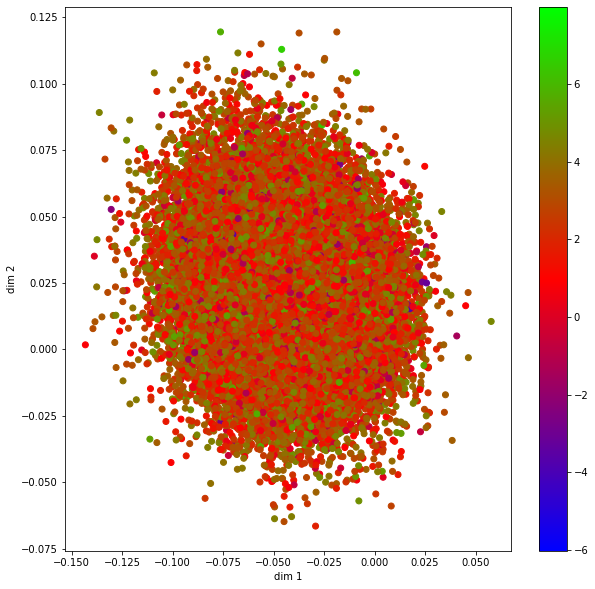

In [84]:

#Plot dim1 and dim2 for mu
plt.figure(figsize=(10, 10))
plt.scatter(Z_mean[:, 0], Z_mean[:, 1],c=logp ,cmap='brg')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.colorbar()
plt.show()

Loading best saved model for generating molecules 

In [54]:
model1 = MoleculeVAE()

In [55]:
trained_model = '/content/drive/MyDrive/ML_2/project/new_best_model.h5'

In [58]:
model1.load(charset, trained_model, latent_rep_size = 114)

In [59]:
test_sample = 'CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1'

test_sample

'CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1'

In [60]:
test_latent = encode_smiles(test_sample, model1, charset)
test_latent.size

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


114

In [61]:
test_latent

array([[ 2.6943812e-01,  4.4802862e-01,  6.9935143e-01, -1.3222426e-01,
        -1.0009681e+00, -1.0238763e+00, -4.9647033e-01,  9.7381091e-01,
        -5.8185661e-01,  7.1797502e-01, -1.1016978e+00, -3.3689213e-01,
        -9.1568120e-02,  3.1968614e-01, -8.2250893e-02,  1.2293563e+00,
        -2.6550403e-01,  3.2556346e-03, -4.2492497e-01, -1.3270947e+00,
         7.1313989e-01,  1.4448118e+00, -2.2483233e-01, -2.1228179e-01,
        -9.5282108e-01,  1.5468325e-01, -4.3868098e-02, -4.1603562e-01,
         1.7389815e-01,  4.0020490e-01, -2.1981010e-01, -8.8252969e-02,
         1.1269593e+00, -3.2735610e-01,  1.7266257e-01, -7.9779774e-02,
        -7.7878034e-01,  7.8688401e-01,  3.7923267e-01, -6.2484551e-02,
        -5.7870579e-01, -5.4256804e-04,  1.3275197e-01, -6.3895985e-02,
        -1.0216132e+00, -6.2782842e-01, -6.1507430e-02, -3.0398117e-02,
        -6.0013634e-01, -2.3300819e-02, -1.0248888e+00, -8.8183290e-01,
        -6.6360348e-01, -3.0385172e-01, -3.5216865e-01, -1.87529

In [63]:
latent_dim = 114

In [64]:
reconstructed_test = decode_latent_molecule(test_latent,model1,charset,latent_dim)
original = Chem.MolFromSmiles(test_sample)

reconstructed_test

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


')(C\n\nc=Nooc\n)(CC\nc!o)(#CI#-oCI@C\n\n)(#Co-#CC#-oCCE@@)))#C)(#C)))C)EEEEEEEEEEE))))))))))))))))ooooEEEE@@OOOOOOOOOO'

The reconstructed molecule doesnt give good results as it doesnt resemble the original model 

In [75]:
paracetamol_smiles = 'CC(=O)Nc1ccc(O)cc1'
celecoxib_smiles = 'Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F'

steps = 10
results = interpolate(paracetamol_smiles, celecoxib_smiles, steps, charset, model1, latent_dim)
                
for result in results:
  print(result)

)
CCI
H=o@
(
cs)(#s((#C)(#C)(#)((#CI#-oC)#-oC)#--c)(#C))(#C))#CC(@CE@E@E))))))FFFFFFF))IIII))EEEEEEEEOOOOOOOOOO
)
C
I
H=o@
(
#s)(#s(#sC(##C)(#)((#CI#-oC)#--C)##-c)(#C))(#C)))C)(CCE@E@EE))))))FFFFFF)))III))EEEEEEEEOOOOOOOOOO
)
C
IcH=o@


#
)(#C(#s)(##C(#C)(#C(#C-#-CC)-#CI#--C)(#C))(CC))CCC@CE@@EEE))))))))FFF)))))II)))EEEEEEEOOOOOOOOOO
)
c
Ic=N!o
6@

)(#C(#C)(#C)(#C)(#C(#--oCI#-oC)##-oC)(#C)(#C))#C)@CE@@EEEEE))))))))))))))))))))EEEEEEEEOOOOOOOOO
@)
c
Ic=N!o
(@

)(#C(sC)(#C)(#C
)(#CI#-oCI#--C)(#-c)((CC)(#C))#C)ECE@EEEEEE)))))))))))))))III)ooEEEEEEEOOOOOOOOO
@)
c
Ic=N!o
(@C
)(#C((C)(#C6)
C))((#C--oCI#--C)(#-oC)(#C)(#C)))C)EEEEEEEEEE)))))))))))))))IIIIooEEEEEEEOOOOOOOOO
@

c
Ic=!!o
(@

((#-ssC(##C66
C))(##C--oCI#--C)(#-oC)(#C)(#C)))C)EEEEEEEEEEE)))))))))))))IIIIIIoEEEEEEEOOOOOOOOO
@




c!!oo(
C
)(#CI--C)(#C
@

[)(#CE--oCC#--oCI#-oC)(#C)(#C))))EEEEEEEEEEEE)))))))))))))IIIIIIoEEEEEEEOOOOOOOOO
@



cc!!ooN(C
)(#C#--C)(#C
6


)(#CE@C-(#C)--oCI@--c)(#C))#C)))EEEEEEEEEEEE)))))))))))))IIIIIIoEEEE

In [216]:
model.create(charset, latent_rep_size)

checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/ML_2/project/new_best_model.h5',
                                   verbose = 1,
                                   save_best_only = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                  factor = 0.2,
                                  patience = 3,
                                  min_lr = 0.0001)

model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 5,
         batch_size = 1000,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/5
187091/187091 [==============================] - ETA: 0s - loss: 5.2616 - accuracy: 0.6580

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_loss improved from inf to 4.46655, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 108s 579us/sample - loss: 5.2616 - accuracy: 0.6580 - val_loss: 4.4665 - val_accuracy: 0.6793
Epoch 2/5
187091/187091 [==============================] - ETA: 0s - loss: 4.2398 - accuracy: 0.6887
Epoch 00002: val_loss improved from 4.46655 to 4.07643, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 96s 513us/sample - loss: 4.2398 - accuracy: 0.6887 - val_loss: 4.0764 - val_accuracy: 0.6938
Epoch 3/5
187091/187091 [==============================] - ETA: 0s - loss: 4.0968 - accuracy: 0.6958
Epoch 00003: val_loss improved from 4.07643 to 3.99533, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 97s 516us/sample - loss: 4.0968 - accuracy: 0.6958 - val_loss: 3.9953 - val_accuracy: 0.7

In [241]:
model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 20,
         batch_size = 1200,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/20
187091/187091 [==============================] - ETA: 0s - loss: 3.8754 - accuracy: 0.7210
Epoch 00001: val_loss improved from 3.91662 to 3.77259, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 93s 499us/sample - loss: 3.8754 - accuracy: 0.7210 - val_loss: 3.7726 - val_accuracy: 0.7243
Epoch 2/20
187091/187091 [==============================] - ETA: 0s - loss: 3.7438 - accuracy: 0.7298
Epoch 00002: val_loss improved from 3.77259 to 3.70479, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 96s 511us/sample - loss: 3.7438 - accuracy: 0.7298 - val_loss: 3.7048 - val_accuracy: 0.7276
Epoch 3/20
187091/187091 [==============================] - ETA: 0s - loss: 3.6666 - accuracy: 0.7349
Epoch 00003: val_loss improved from 3.70479 to 3.55235, saving model to /content/drive/MyDrive/ML_2/project

In [254]:
model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 20,
         batch_size = 1200,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/20
187091/187091 [==============================] - ETA: 0s - loss: 1.8985 - accuracy: 0.8731
Epoch 00001: val_loss improved from 1.88248 to 1.78969, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 93s 499us/sample - loss: 1.8985 - accuracy: 0.8731 - val_loss: 1.7897 - val_accuracy: 0.8818
Epoch 2/20
187091/187091 [==============================] - ETA: 0s - loss: 1.8292 - accuracy: 0.8778
Epoch 00002: val_loss improved from 1.78969 to 1.71855, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 95s 510us/sample - loss: 1.8292 - accuracy: 0.8778 - val_loss: 1.7185 - val_accuracy: 0.8862
Epoch 3/20
187091/187091 [==============================] - ETA: 0s - loss: 1.7115 - accuracy: 0.8865
Epoch 00003: val_loss did not improve from 1.71855
187091/187091 [==============================] - 93s 497

In [261]:
model.autoencoder.fit(
         X_train,
         Y_train,
         shuffle = True,
         epochs = 20,
         batch_size = 1200,
        callbacks = [checkpointer, reduce_lr],
        validation_data = (X_test,Y_test))

Train on 187091 samples, validate on 62364 samples
Epoch 1/20
187091/187091 [==============================] - ETA: 0s - loss: 0.9878 - accuracy: 0.9374
Epoch 00001: val_loss improved from 0.89889 to 0.87196, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 96s 513us/sample - loss: 0.9878 - accuracy: 0.9374 - val_loss: 0.8720 - val_accuracy: 0.9447
Epoch 2/20
187091/187091 [==============================] - ETA: 0s - loss: 1.0080 - accuracy: 0.9361
Epoch 00002: val_loss improved from 0.87196 to 0.84889, saving model to /content/drive/MyDrive/ML_2/project/new_best_model.h5
187091/187091 [==============================] - 99s 529us/sample - loss: 1.0080 - accuracy: 0.9361 - val_loss: 0.8489 - val_accuracy: 0.9463
Epoch 3/20
187091/187091 [==============================] - ETA: 0s - loss: 1.0296 - accuracy: 0.9351
Epoch 00003: val_loss improved from 0.84889 to 0.82698, saving model to /content/drive/MyDrive/ML_2/project

Trained the model again in batches to improve accuracy but the output from the trained model was not satisfactory trying LSTM based approach in another notebook to see the results 